In [1]:
import sys
import pandas as pd
from matplotlib import pyplot as plt
from pandas import DataFrame, read_excel
from pandas import pivot_table, crosstab, melt, merge
import seaborn as sb
import numpy as np

In [40]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

In [41]:
# 데이터 가져오기

df = read_excel("https://data.hossam.kr/D02/wage.xlsx")
df

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [42]:
df.dtypes

year            int64
age             int64
maritl         object
race           object
education      object
region         object
jobclass       object
health         object
health_ins     object
logwage       float64
wage          float64
dtype: object

In [43]:
df['maritl'] = np.where(df['maritl'] == '1. Never Married', 1, 2)
df['maritl'] = df['maritl'].astype('category')
df

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,2,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [44]:
df['race'] = np.where(df['race'] == '1. White', 1, 2)
df['race'] = df['race'].astype('category')
df

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1,1,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1,1,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2,1,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2,2,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,2,1,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2,1,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2,1,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2,2,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1,1,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [47]:
df['education'] = np.where(df['education'] == '1. < HS Grad', 1, 2)
df['education'] = df['education'].astype('category')
df

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1,1,2,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1,1,2,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2,1,2,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2,2,2,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,2,1,2,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2,1,2,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2,1,2,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2,2,2,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1,1,2,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [48]:
df['region'] = np.where(df['region'] == '2. Middle Atlantic', 1, 2)
df['region'] = df['region'].astype('category')
df

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1,1,2,1,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1,1,2,1,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2,1,2,1,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2,2,2,1,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,2,1,2,1,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2,1,2,1,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2,1,2,1,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2,2,2,1,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1,1,2,1,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


In [49]:
df['jobclass'] = np.where(df['jobclass'] == '1. Industrial', 1, 2)
df['jobclass'] = df['jobclass'].astype('category')
df

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1,1,2,1,1,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1,1,2,1,2,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2,1,2,1,1,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2,2,2,1,2,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,2,1,2,1,2,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2,1,2,1,1,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2,1,2,1,1,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2,2,2,1,1,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1,1,2,1,1,2. >=Very Good,1. Yes,4.477121,87.981033


In [50]:
df['health'] = np.where(df['health'] == '1. <=Good', 1, 2)
df['health'] = df['health'].astype('category')
df

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1,1,2,1,1,1,2. No,4.318063,75.043154
1,2004,24,1,1,2,1,2,2,2. No,4.255273,70.476020
2,2003,45,2,1,2,1,1,1,1. Yes,4.875061,130.982177
3,2003,43,2,2,2,1,2,2,1. Yes,5.041393,154.685293
4,2005,50,2,1,2,1,2,1,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2,1,2,1,1,2,1. Yes,5.041393,154.685293
2996,2007,30,2,1,2,1,1,2,2. No,4.602060,99.689464
2997,2005,27,2,2,2,1,1,1,2. No,4.193125,66.229408
2998,2005,27,1,1,2,1,1,2,1. Yes,4.477121,87.981033


In [51]:
df['health_ins'] = np.where(df['health_ins'] == '1. Yes', 1, 2)
df['health_ins'] = df['health_ins'].astype('category')
df

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1,1,2,1,1,1,2,4.318063,75.043154
1,2004,24,1,1,2,1,2,2,2,4.255273,70.476020
2,2003,45,2,1,2,1,1,1,1,4.875061,130.982177
3,2003,43,2,2,2,1,2,2,1,5.041393,154.685293
4,2005,50,2,1,2,1,2,1,1,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2,1,2,1,1,2,1,5.041393,154.685293
2996,2007,30,2,1,2,1,1,2,2,4.602060,99.689464
2997,2005,27,2,2,2,1,1,1,2,4.193125,66.229408
2998,2005,27,1,1,2,1,1,2,1,4.477121,87.981033


In [65]:
df.drop(columns= 'year', axis = 1, inplace = True)
df

,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,18,1,1,2,1,1,1,2,4.318063,75.043154
1,24,1,1,2,1,2,2,2,4.255273,70.476020
2,45,2,1,2,1,1,1,1,4.875061,130.982177
3,43,2,2,2,1,2,2,1,5.041393,154.685293
4,50,2,1,2,1,2,1,1,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...
2995,44,2,1,2,1,1,2,1,5.041393,154.685293
2996,30,2,1,2,1,1,2,2,4.602060,99.689464
2997,27,2,2,2,1,1,1,2,4.193125,66.229408
2998,27,1,1,2,1,1,2,1,4.477121,87.981033


In [66]:
df.describe()

,age,logwage,wage
count,3000.000000,3000.000000,3000.000000
mean,42.414667,4.653905,111.703608
std,11.542406,0.351753,41.728595
min,18.000000,3.000000,20.085537
25%,33.750000,4.447158,85.383940
50%,42.000000,4.653213,104.921507
75%,51.000000,4.857332,128.680488
max,80.000000,5.763128,318.342430


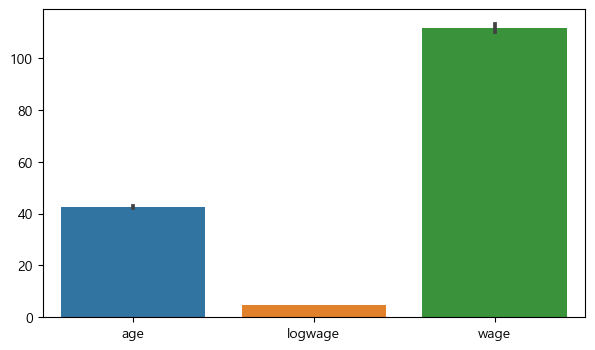

In [67]:
plt.figure()

sb.barplot(df)

plt.show()
plt.close()